In [1]:
import json
import os
import sys

import torchvision.datasets as dset

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from testing import *

/home/xbuban1/llama_games_venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
ds = dset.CocoCaptions(
    root = '/home/xbuban1/coco/images/val2017',
    annFile = '/home/xbuban1/coco/annotations/captions_val2017.json'
)

ved_scores = coco_eval_avg(ds, "captions/coco/ved.json")
val_224_no_merge_scores = coco_eval_avg(ds, "captions/coco/3.1_val_224_no_merge.json")
val_224_merge_scores = coco_eval_avg(ds, "captions/coco/3.1_val_224_merge.json")
val_448_no_merge_scores = coco_eval_avg(ds, "captions/coco/3.1_val_448_no_merge.json")
val_448_merge_scores = coco_eval_avg(ds, "captions/coco/3.1_val_448_merge.json")
finetuned_scores = coco_eval_avg(ds, "captions/coco/finetune.json")

score_dict = {
    'ved': ved_scores,
    'val_224_no_merge': val_224_no_merge_scores,
    'val_224_merge': val_224_merge_scores,
    'val_448_no_merge': val_448_no_merge_scores,
    'val_448_merge': val_448_merge_scores,
    'finetuned': finetuned_scores
}

with open("captions/eval_scores.json", "w") as f:
    json.dump(score_dict, f, indent=4)

loading annotations into memory...
Done (t=0.03s)
creating index...
index created!


Calculating scores:   0%|          | 0/5000 [00:00<?, ?it/s][nltk_data] Downloading package wordnet to /home/xbuban1/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /home/xbuban1/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/xbuban1/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
Calculating scores: 100%|██████████| 5000/5000 [10:29<00:00,  7.94it/s]


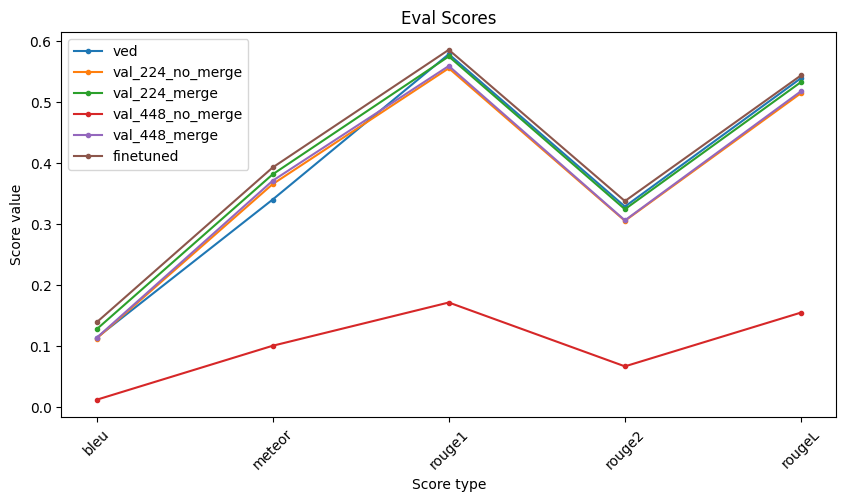

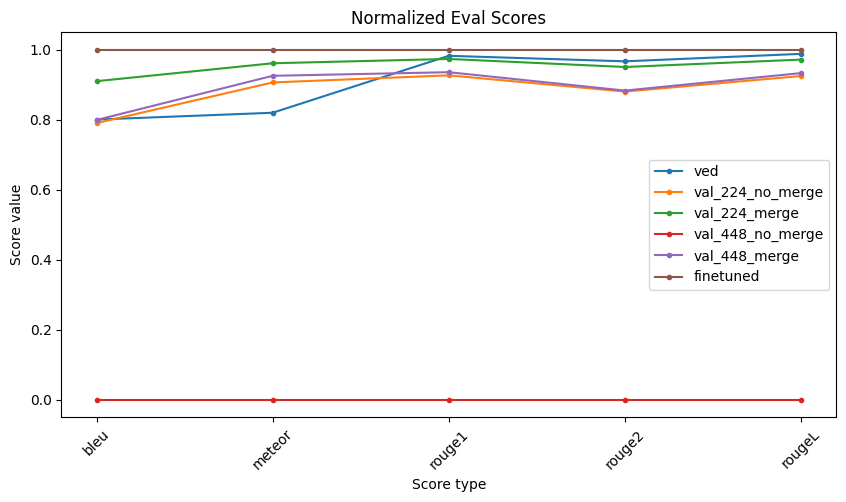

In [3]:
lineplot_scores(score_dict, "Eval Scores")
lineplot_scores(normalize_scores(score_dict), "Normalized Eval Scores")